In [1]:
import pandas
df_main = pandas.read_csv("../source.csv", low_memory=False)

In [2]:
def col_search(df, strg = None):
    """
    Searches list of columns and finds those with strg in the name

    Arguments
    ---------
    df -- pandas dataframe to be searched
    strg -- string that is optionally searched for
    """
    for col in df.columns:
        if strg == None:
            print(col)
        else:
            if strg.lower() in col.lower():
                print(col)


In [3]:
# look for column with judge
col_search(df_main, "judge")

SP_JudgeatSentencing


In [4]:
# Remove leading and trailing white space from column and 
# view unique values
df_main["SP_JudgeatSentencing"] = df_main["SP_JudgeatSentencing"].apply(str.strip)
df_main.SP_JudgeatSentencing.unique()

array(['HAWORTH, LEE', 'HAWORTH, LEE E', 'WILLIAMS, CHARLES',
       'WILLIAMS, CHARLES E', 'HAWORTH'], dtype=object)

In [5]:
# Filter on Williams
idx_will = df_main.SP_JudgeatSentencing.isin(('WILLIAMS, CHARLES', 'WILLIAMS, CHARLES E'))
df_will = df_main[idx_will]
df_will.SP_JudgeatSentencing.unique()

array(['WILLIAMS, CHARLES', 'WILLIAMS, CHARLES E'], dtype=object)

In [6]:
# filter on felonies
idx_fel = df_will.CP_DegreeOfCharge.isin(("F","S","T", "P"))
df_will = df_will[idx_fel]
df_will.CP_DegreeOfCharge.unique()

array(['F', 'S', 'T', 'P'], dtype=object)

In [7]:
# filter on if it was a judge trial
idx_trial = df_will.CP_TypeOfTrial == "3"
df_will = df_will[idx_trial]

# filter on not juvenile
df_will = df_will[ df_will.BP_CourtDesignator != "J"]

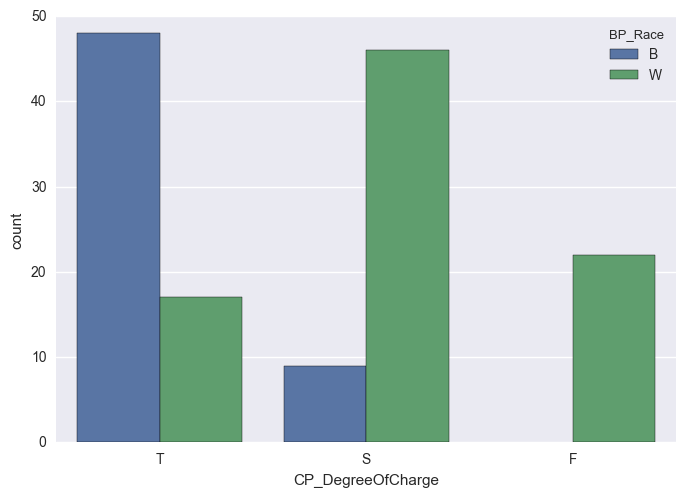

In [8]:
# plot case
%matplotlib inline
import seaborn
seaborn.countplot(x="CP_DegreeOfCharge", data=df_will, hue="BP_Race")

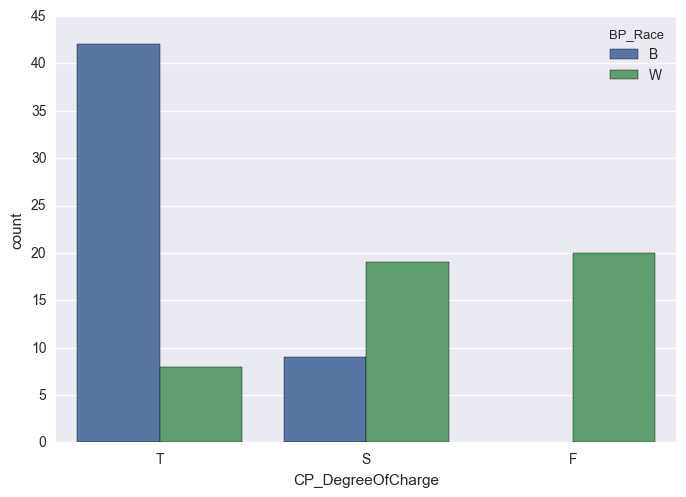

In [9]:
# same plot as before, but cases have been filtered on those where guilty
# decided by judge
df_will_guilt = df_will[df_will.CP_CourtActionTaken == "G"]
seaborn.countplot(x="CP_DegreeOfCharge", data=df_will_guilt, hue="BP_Race")